## Neighborhood/Global Distances

In [1]:
import sys
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

FIt-SNE repository not detected. Functionality will be disabled.


In [2]:
# read in Macosko retina data
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv.gz', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
# read in Herring colon data
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.norowlabels.tsv.gz', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')

In [3]:
# look at dimensions of counts matrix (cells, genes)
retina.data.shape

(1326, 500)

In [4]:
# look at dimensions of counts matrix (cells, genes)
colon.data.shape

(1117, 500)

In [5]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'KLD':{}}, 'Colon':{'R':{}, 'EMD':{}, 'KLD':{}}}

---

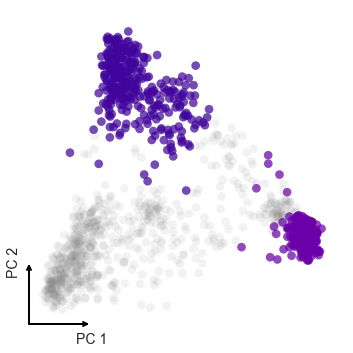

In [45]:
retina_PCA2 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=2)
retina_PCA2.plot_barcodes(ranks=['0','1']) # bipolar cells and rods

In [46]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform='arcsinh'), post=retina_PCA2.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (2)'], final_distance_stats['Retina']['EMD']['PCA (2)'], final_distance_stats['Retina']['KLD']['PCA (2)'] = corr_stats[0], EMD, KLD

R: 0.7256
EMD: 0.0313
KLD: 0.0163
CPU times: user 179 ms, sys: 33.6 ms, total: 213 ms
Wall time: 219 ms


CPU times: user 17.9 s, sys: 394 ms, total: 18.3 s
Wall time: 17.7 s


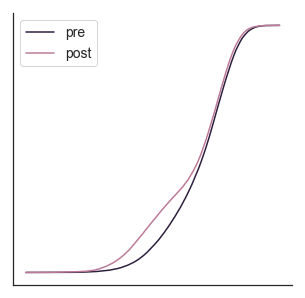

<Figure size 504x504 with 0 Axes>

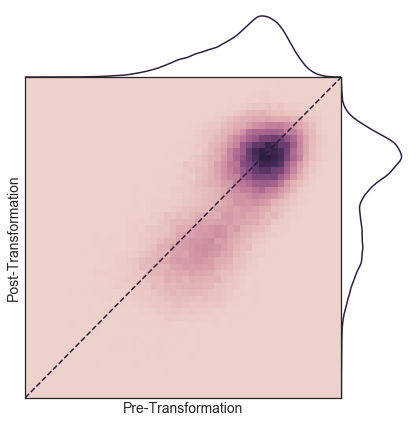

In [48]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [49]:
retina_PCA10 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=10)

In [50]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform='arcsinh'), post=retina_PCA10.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (10)'], final_distance_stats['Retina']['EMD']['PCA (10)'], final_distance_stats['Retina']['KLD']['PCA (10)'] = corr_stats[0], EMD, KLD

R: 0.7387
EMD: 0.034
KLD: 0.0134
CPU times: user 185 ms, sys: 36.9 ms, total: 222 ms
Wall time: 227 ms


CPU times: user 18.3 s, sys: 346 ms, total: 18.6 s
Wall time: 17.9 s


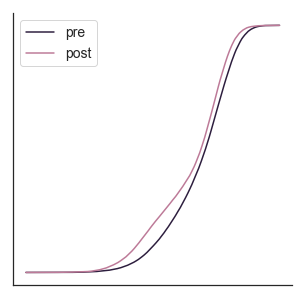

<Figure size 504x504 with 0 Axes>

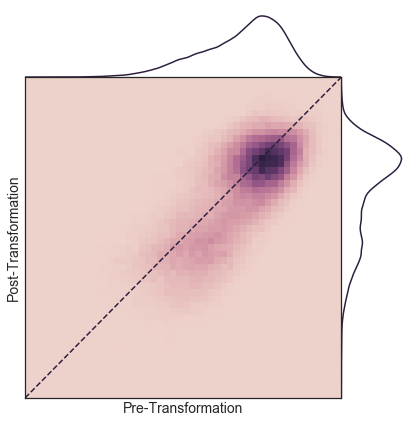

In [51]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_PCA10_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_PCA10_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

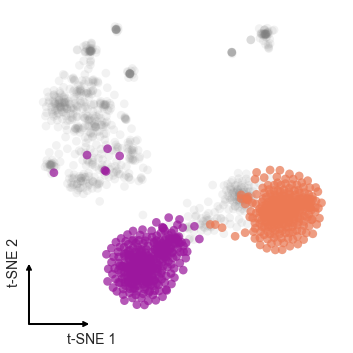

In [52]:
retina_tSNE = DR.from_file('pymethods_out/retina_tSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_tSNE.plot_barcodes(ranks=['0','1']) 

In [53]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform='arcsinh'), post=retina_tSNE.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE'], final_distance_stats['Retina']['EMD']['t-SNE'], final_distance_stats['Retina']['KLD']['t-SNE'] = corr_stats[0], EMD, KLD

R: 0.6152
EMD: 0.1711
KLD: 0.0173
CPU times: user 168 ms, sys: 12.1 ms, total: 180 ms
Wall time: 180 ms


CPU times: user 18.1 s, sys: 444 ms, total: 18.5 s
Wall time: 17.9 s


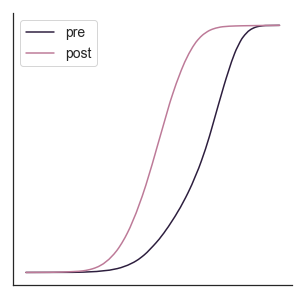

<Figure size 504x504 with 0 Axes>

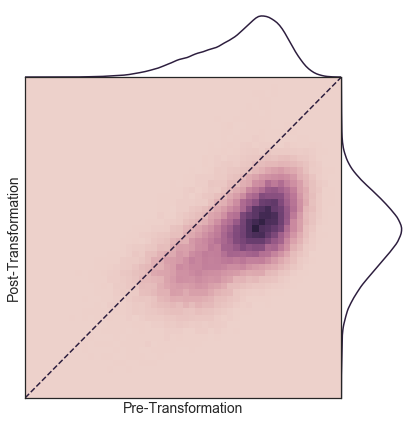

In [54]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

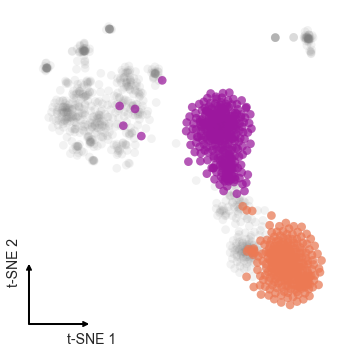

In [55]:
retina_FItSNE = DR.from_file('pymethods_out/retina_FItSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_FItSNE.plot_barcodes(ranks=['0','1']) 

In [56]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform='arcsinh'), post=retina_FItSNE.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['FIt-SNE'], final_distance_stats['Retina']['EMD']['FIt-SNE'], final_distance_stats['Retina']['KLD']['FIt-SNE'] = corr_stats[0], EMD, KLD

R: 0.6213
EMD: 0.188
KLD: 0.0183
CPU times: user 163 ms, sys: 12.4 ms, total: 175 ms
Wall time: 176 ms


CPU times: user 17.8 s, sys: 371 ms, total: 18.2 s
Wall time: 17.6 s


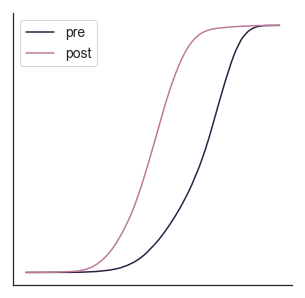

<Figure size 504x504 with 0 Axes>

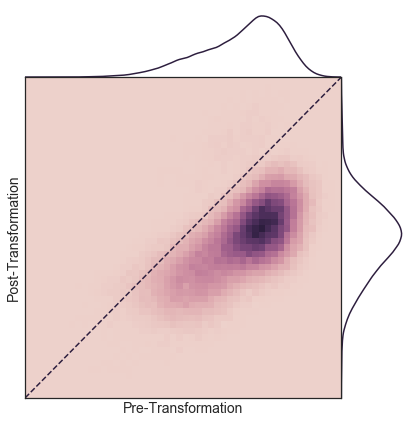

In [57]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_FItSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_FItSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

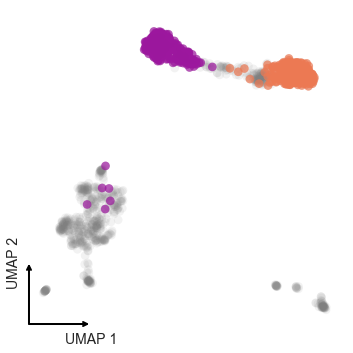

In [58]:
retina_UMAP = DR.from_file('pymethods_out/retina_UMAP.csv', name='UMAP', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_UMAP.plot_barcodes(ranks=['0','1']) 

In [59]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform='arcsinh'), post=retina_UMAP.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP'], final_distance_stats['Retina']['EMD']['UMAP'], final_distance_stats['Retina']['KLD']['UMAP'] = corr_stats[0], EMD, KLD

R: 0.5458
EMD: 0.2149
KLD: 0.016
CPU times: user 172 ms, sys: 16.6 ms, total: 188 ms
Wall time: 164 ms


CPU times: user 17.8 s, sys: 370 ms, total: 18.2 s
Wall time: 17.6 s


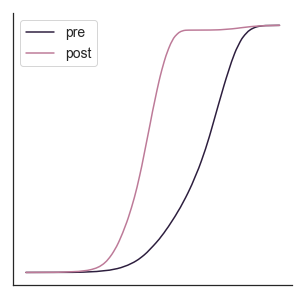

<Figure size 504x504 with 0 Axes>

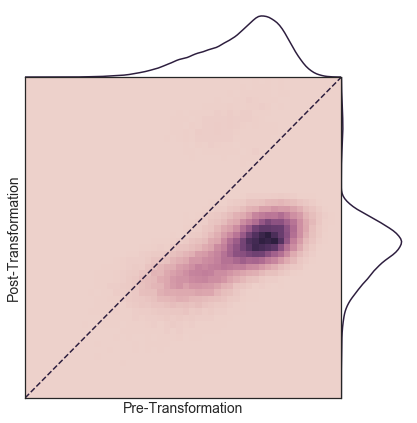

In [60]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

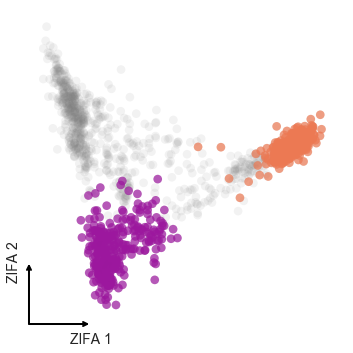

In [61]:
retina_ZIFA = DR.from_file('pymethods_out/retina_ZIFA.csv', name='ZIFA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_ZIFA.plot_barcodes(ranks=['0','1']) # rods & cones

In [62]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform='log2'), post=retina_ZIFA.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZIFA'], final_distance_stats['Retina']['EMD']['ZIFA'], final_distance_stats['Retina']['KLD']['ZIFA'] = corr_stats[0], EMD, KLD

R: 0.4078
EMD: 0.3864
KLD: 0.0396
CPU times: user 160 ms, sys: 14.1 ms, total: 174 ms
Wall time: 174 ms


CPU times: user 17.8 s, sys: 424 ms, total: 18.2 s
Wall time: 17.7 s


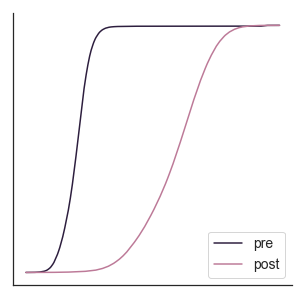

<Figure size 504x504 with 0 Axes>

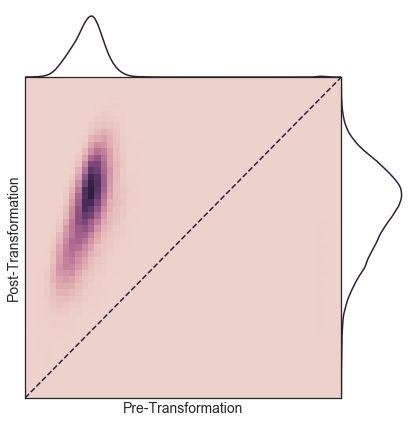

In [63]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

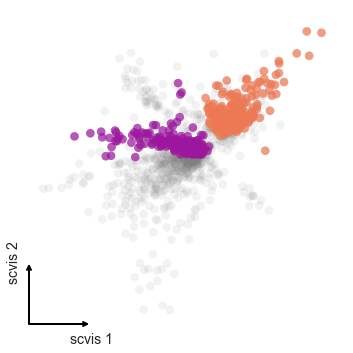

In [64]:
retina_scvis = DR.from_file('scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='pymethods_out/retina_clu.csv')
retina_scvis.plot_barcodes(ranks=['0','1']) # rods & cones

In [65]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform=None), post=retina_scvis.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scvis'], final_distance_stats['Retina']['EMD']['scvis'], final_distance_stats['Retina']['KLD']['scvis'] = corr_stats[0], EMD, KLD

R: 0.8352
EMD: 0.0871
KLD: 0.0664
CPU times: user 154 ms, sys: 11.4 ms, total: 165 ms
Wall time: 167 ms


CPU times: user 17.5 s, sys: 377 ms, total: 17.9 s
Wall time: 17.4 s


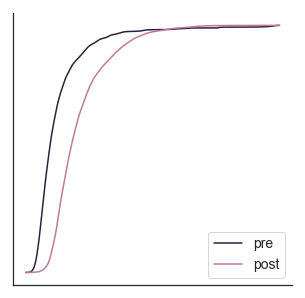

<Figure size 504x504 with 0 Axes>

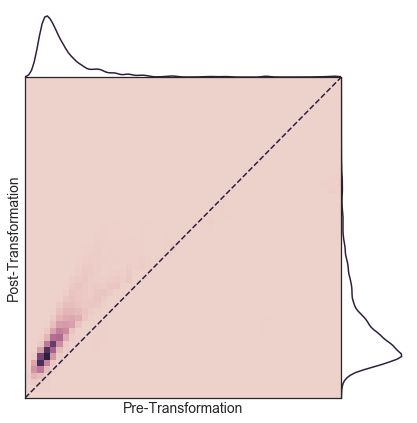

In [66]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

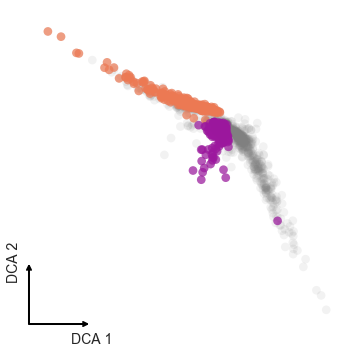

In [67]:
retina_DCA = DR.from_file('pymethods_out/retina_DCA.csv', name='DCA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_DCA.plot_barcodes(ranks=['0','1']) # rods & cones

In [68]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform=None), post=retina_DCA.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['DCA'], final_distance_stats['Retina']['EMD']['DCA'], final_distance_stats['Retina']['KLD']['DCA'] = corr_stats[0], EMD, KLD

R: 0.8219
EMD: 0.0201
KLD: 0.0848
CPU times: user 152 ms, sys: 10.8 ms, total: 163 ms
Wall time: 163 ms


CPU times: user 17.4 s, sys: 398 ms, total: 17.8 s
Wall time: 17.3 s


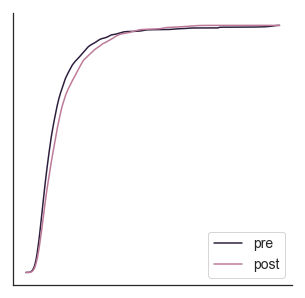

<Figure size 504x504 with 0 Axes>

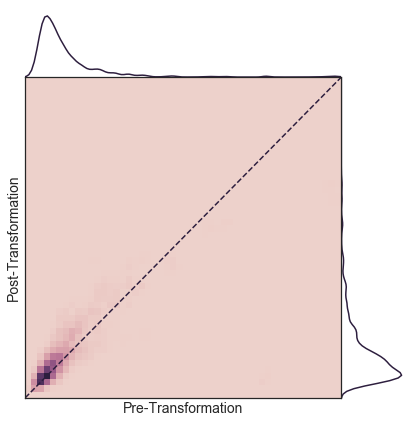

In [69]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

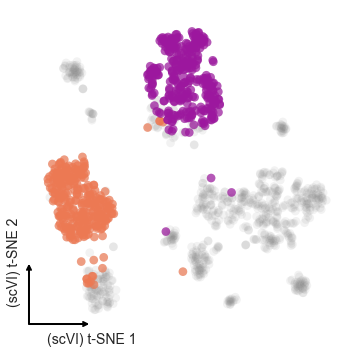

In [70]:
retina_scVI = DR.from_file('pymethods_out/retina_scVI.csv', name='scVI', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE = DR.from_file('pymethods_out/retina_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE.plot_barcodes(ranks=['0','1'])

In [71]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform=None), post=retina_scVI.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scVI'], final_distance_stats['Retina']['EMD']['scVI'], final_distance_stats['Retina']['KLD']['scVI'] = corr_stats[0], EMD, KLD

R: 0.0714
EMD: 0.3842
KLD: 0.2815
CPU times: user 149 ms, sys: 14.2 ms, total: 163 ms
Wall time: 164 ms


CPU times: user 17.6 s, sys: 404 ms, total: 18 s
Wall time: 17.4 s


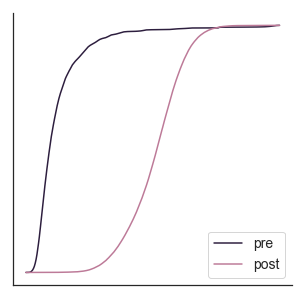

<Figure size 504x504 with 0 Axes>

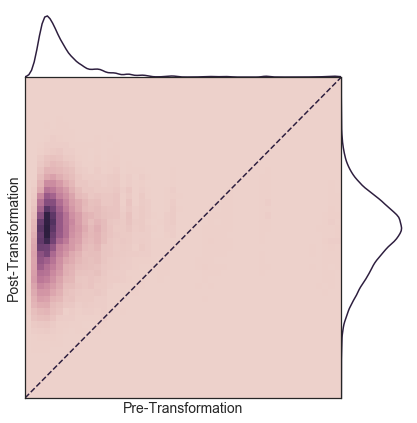

In [72]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

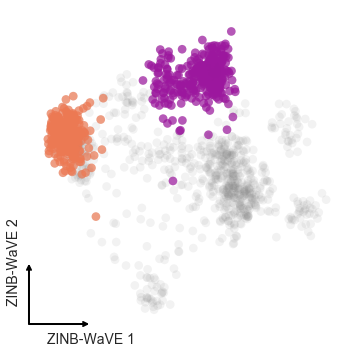

In [73]:
retina_ZINBWAVE = DR.from_file('Rmethods_out/retina_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_ZINBWAVE.plot_barcodes(ranks=['0','1']) 

In [74]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform=None), post=retina_ZINBWAVE.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZINB-WaVE'], final_distance_stats['Retina']['EMD']['ZINB-WaVE'], final_distance_stats['Retina']['KLD']['ZINB-WaVE'] = corr_stats[0], EMD, KLD

R: 0.0857
EMD: 0.4161
KLD: 0.283
CPU times: user 158 ms, sys: 11.6 ms, total: 170 ms
Wall time: 170 ms


CPU times: user 17.5 s, sys: 397 ms, total: 17.9 s
Wall time: 17.4 s


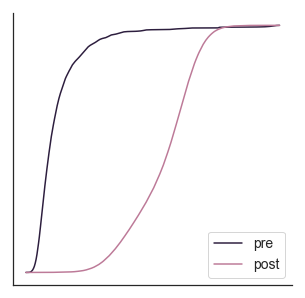

<Figure size 504x504 with 0 Axes>

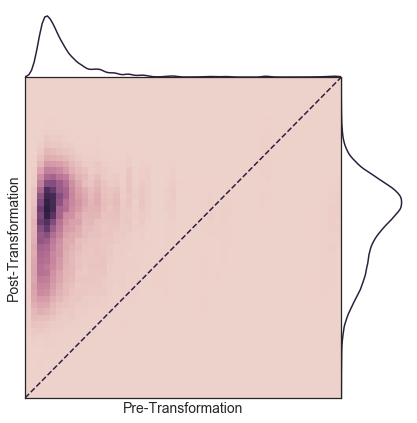

In [75]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

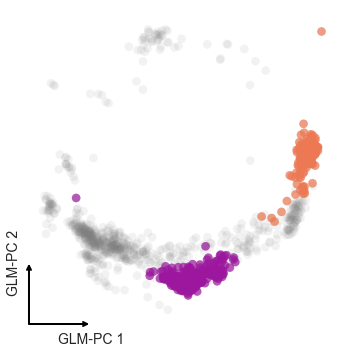

In [76]:
retina_GLMPCA = DR.from_file('Rmethods_out/retina_GLM-PCA.csv', name='GLM-PC', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_GLMPCA.plot_barcodes(ranks=['0','1']) 

In [77]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform=None), post=retina_GLMPCA.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['GLM-PCA'], final_distance_stats['Retina']['EMD']['GLM-PCA'], final_distance_stats['Retina']['KLD']['GLM-PCA'] = corr_stats[0], EMD, KLD

R: 0.0851
EMD: 0.3526
KLD: 0.2818
CPU times: user 152 ms, sys: 11.9 ms, total: 164 ms
Wall time: 164 ms


CPU times: user 17.5 s, sys: 425 ms, total: 18 s
Wall time: 17.4 s


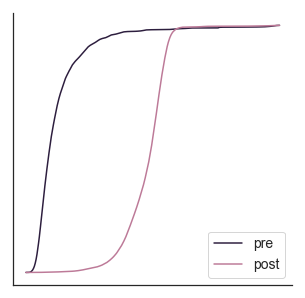

<Figure size 504x504 with 0 Axes>

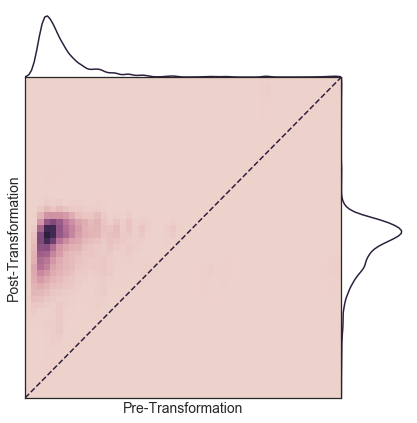

In [78]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

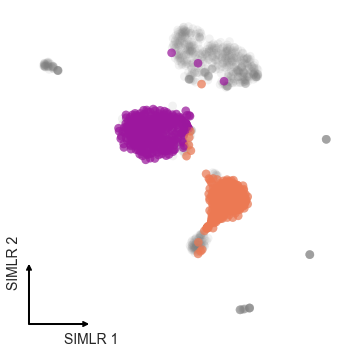

In [79]:
retina_SIMLR = DR.from_file('Rmethods_out/retina_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_SIMLR.plot_barcodes(ranks=['0','1'])

In [80]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['0','1'], transform='arcsinh'), post=retina_SIMLR.barcode_distance_matrix(ranks=['0','1']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['SIMLR'], final_distance_stats['Retina']['EMD']['SIMLR'], final_distance_stats['Retina']['KLD']['SIMLR'] = corr_stats[0], EMD, KLD

R: 0.353
EMD: 0.2112
KLD: 0.0271
CPU times: user 170 ms, sys: 13.8 ms, total: 184 ms
Wall time: 184 ms


CPU times: user 17.7 s, sys: 383 ms, total: 18.1 s
Wall time: 17.4 s


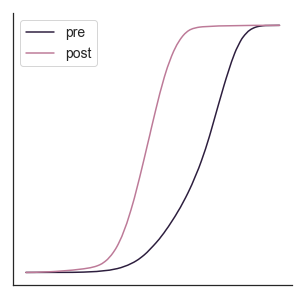

<Figure size 504x504 with 0 Axes>

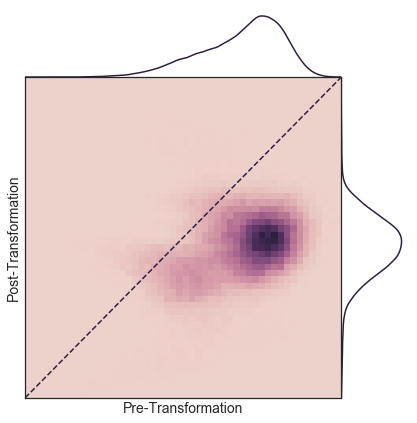

In [81]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/retina_neighborhood_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
Now Colon Dataset

In [84]:
colon.barcode_counts()

0.0    274
1.0    273
2.0    167
3.0    140
4.0    135
5.0    128
Name: Barcode, dtype: int64

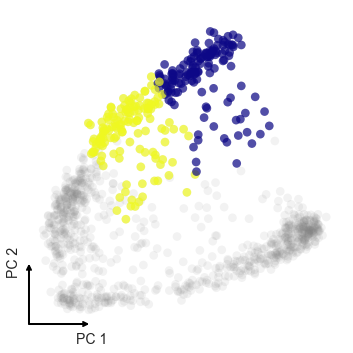

In [85]:
colon_PCA2 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=2)
colon_PCA2.plot_barcodes(ranks=['3','4']) # mature and developing goblet cells

In [86]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform='arcsinh'), post=colon_PCA2.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (2)'], final_distance_stats['Colon']['EMD']['PCA (2)'], final_distance_stats['Colon']['KLD']['PCA (2)'] = corr_stats[0], EMD, KLD

R: 0.8426
EMD: 0.0212
KLD: 0.0296
CPU times: user 56.1 ms, sys: 6.07 ms, total: 62.2 ms
Wall time: 61 ms


CPU times: user 17.7 s, sys: 369 ms, total: 18.1 s
Wall time: 17.5 s


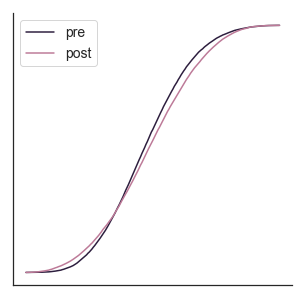

<Figure size 504x504 with 0 Axes>

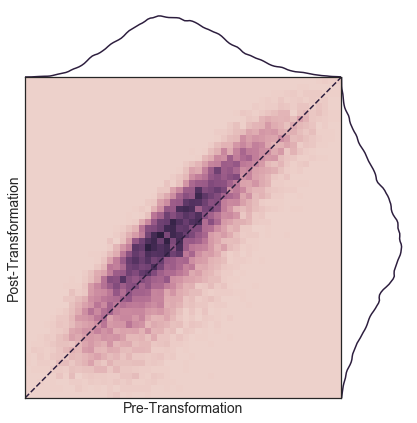

In [87]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [88]:
colon_PCA10 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=10)

In [89]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform='arcsinh'), post=colon_PCA10.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (10)'], final_distance_stats['Colon']['EMD']['PCA (10)'], final_distance_stats['Colon']['KLD']['PCA (10)'] = corr_stats[0], EMD, KLD

R: 0.9014
EMD: 0.0078
KLD: 0.0172
CPU times: user 69.7 ms, sys: 20.7 ms, total: 90.4 ms
Wall time: 121 ms


CPU times: user 17.8 s, sys: 432 ms, total: 18.2 s
Wall time: 18 s


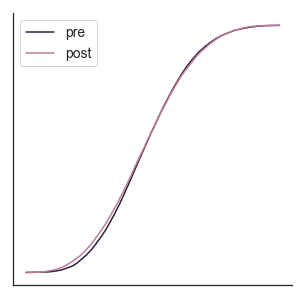

<Figure size 504x504 with 0 Axes>

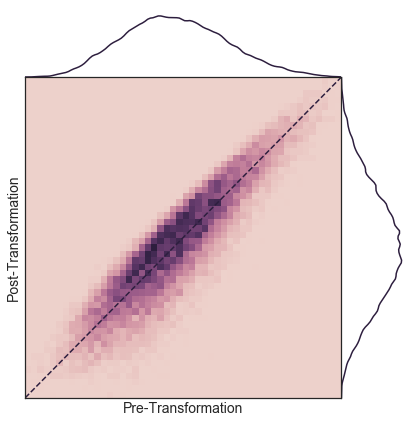

In [90]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_PCA10_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_PCA10_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

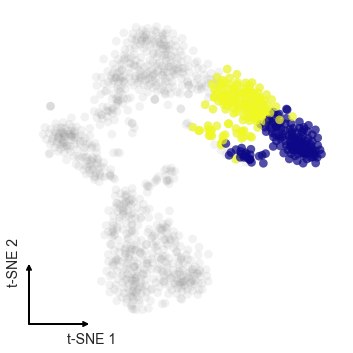

In [92]:
colon_tSNE = DR.from_file('pymethods_out/colon_tSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_tSNE.plot_barcodes(ranks=['3','4']) 

In [93]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform='arcsinh'), post=colon_tSNE.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE'], final_distance_stats['Colon']['EMD']['t-SNE'], final_distance_stats['Colon']['KLD']['t-SNE'] = corr_stats[0], EMD, KLD

R: 0.8082
EMD: 0.0103
KLD: 0.0324
CPU times: user 59.4 ms, sys: 12.1 ms, total: 71.5 ms
Wall time: 71 ms


CPU times: user 17.7 s, sys: 374 ms, total: 18.1 s
Wall time: 17.6 s


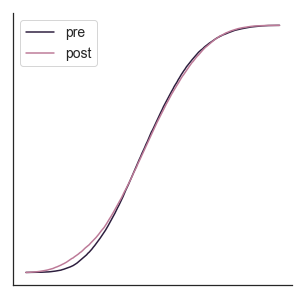

<Figure size 504x504 with 0 Axes>

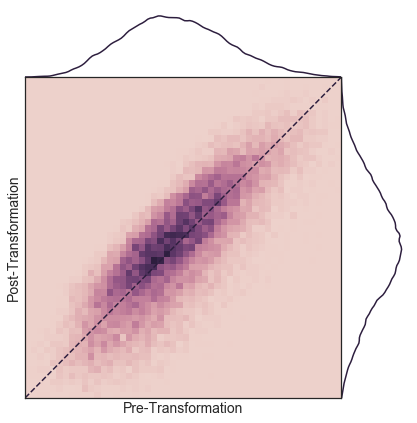

In [94]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

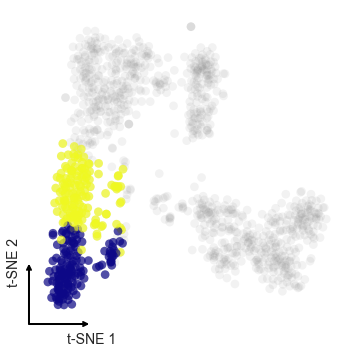

In [95]:
colon_FItSNE = DR.from_file('pymethods_out/colon_FItSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_FItSNE.plot_barcodes(ranks=['3','4']) 

In [96]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform='arcsinh'), post=colon_FItSNE.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['FIt-SNE'], final_distance_stats['Colon']['EMD']['FIt-SNE'], final_distance_stats['Colon']['KLD']['FIt-SNE'] = corr_stats[0], EMD, KLD

R: 0.8166
EMD: 0.0286
KLD: 0.0307
CPU times: user 61.4 ms, sys: 7.94 ms, total: 69.4 ms
Wall time: 79.4 ms


CPU times: user 19.1 s, sys: 394 ms, total: 19.5 s
Wall time: 20.5 s


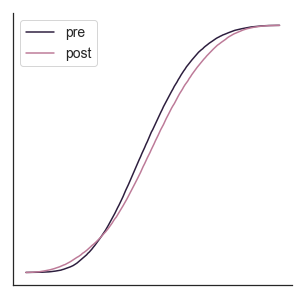

<Figure size 504x504 with 0 Axes>

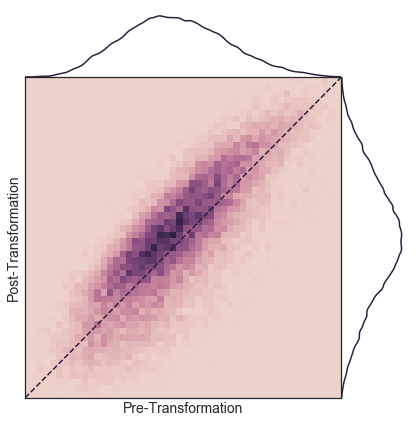

In [97]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_FItSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_FItSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

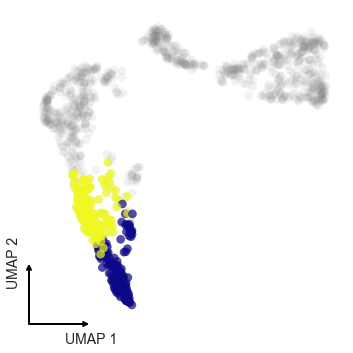

In [98]:
colon_UMAP = DR.from_file('pymethods_out/colon_UMAP.csv', name='UMAP', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_UMAP.plot_barcodes(ranks=['3','4']) 

In [99]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform='arcsinh'), post=colon_UMAP.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP'], final_distance_stats['Colon']['EMD']['UMAP'], final_distance_stats['Colon']['KLD']['UMAP'] = corr_stats[0], EMD, KLD

R: 0.7835
EMD: 0.0158
KLD: 0.0387
CPU times: user 95 ms, sys: 13.2 ms, total: 108 ms
Wall time: 61.5 ms


CPU times: user 20.1 s, sys: 486 ms, total: 20.5 s
Wall time: 20.7 s


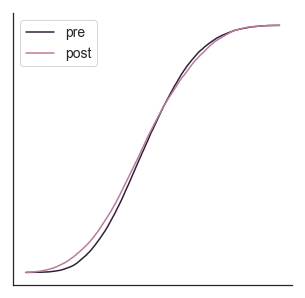

<Figure size 504x504 with 0 Axes>

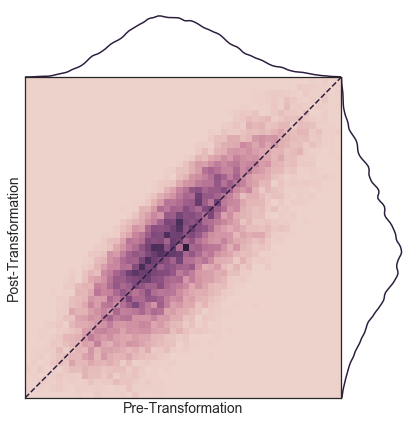

In [100]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

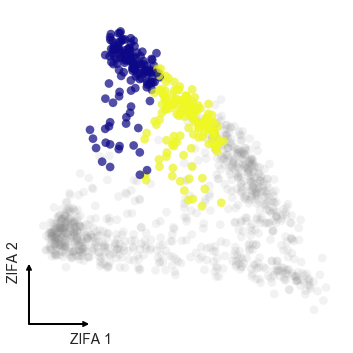

In [101]:
colon_ZIFA = DR.from_file('pymethods_out/colon_ZIFA.csv', name='ZIFA', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_ZIFA.plot_barcodes(ranks=['3','4']) # rods & cones

In [102]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform='log2'), post=colon_ZIFA.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZIFA'], final_distance_stats['Colon']['EMD']['ZIFA'], final_distance_stats['Colon']['KLD']['ZIFA'] = corr_stats[0], EMD, KLD

R: 0.6901
EMD: 0.0519
KLD: 0.0807
CPU times: user 78.9 ms, sys: 12.1 ms, total: 91 ms
Wall time: 51.8 ms


CPU times: user 19.6 s, sys: 361 ms, total: 20 s
Wall time: 19.6 s


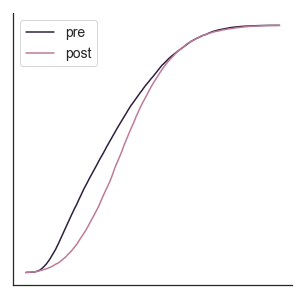

<Figure size 504x504 with 0 Axes>

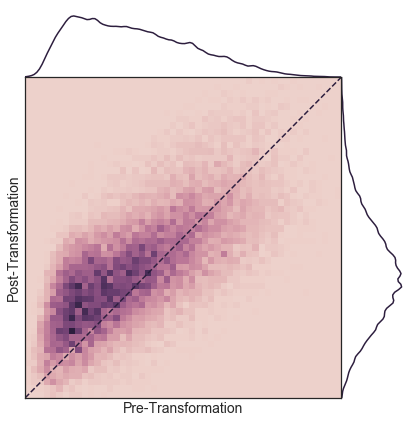

In [103]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

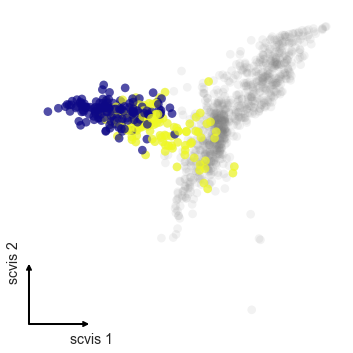

In [104]:
colon_scvis = DR.from_file('scvis_out/colon/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='pymethods_out/colon_clu.csv')
colon_scvis.plot_barcodes(ranks=['3','4']) # rods & cones

In [105]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform=None), post=colon_scvis.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scvis'], final_distance_stats['Colon']['EMD']['scvis'], final_distance_stats['Colon']['KLD']['scvis'] = corr_stats[0], EMD, KLD

R: 0.8068
EMD: 0.0085
KLD: 0.0763
CPU times: user 69.4 ms, sys: 25.2 ms, total: 94.6 ms
Wall time: 52.5 ms


CPU times: user 19.6 s, sys: 361 ms, total: 19.9 s
Wall time: 19.6 s


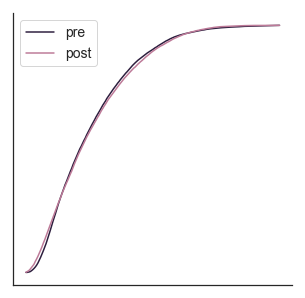

<Figure size 504x504 with 0 Axes>

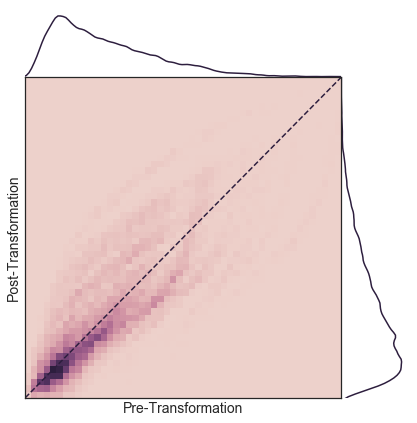

In [106]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

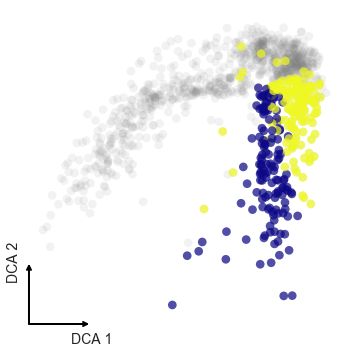

In [107]:
colon_DCA = DR.from_file('pymethods_out/colon_DCA.csv', name='DCA', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_DCA.plot_barcodes(ranks=['3','4']) # rods & cones

In [108]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform=None), post=colon_DCA.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['DCA'], final_distance_stats['Colon']['EMD']['DCA'], final_distance_stats['Colon']['KLD']['DCA'] = corr_stats[0], EMD, KLD

R: 0.6322
EMD: 0.0336
KLD: 0.1377
CPU times: user 50.8 ms, sys: 6.02 ms, total: 56.8 ms
Wall time: 68.2 ms


CPU times: user 19.4 s, sys: 360 ms, total: 19.7 s
Wall time: 19.3 s


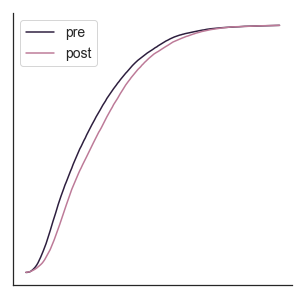

<Figure size 504x504 with 0 Axes>

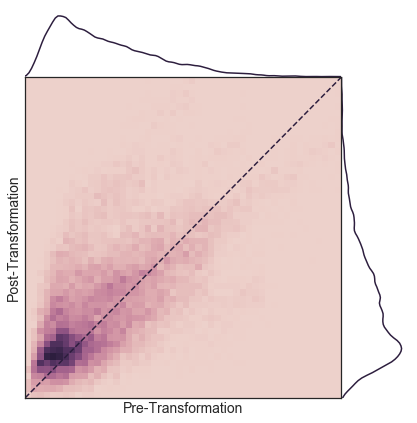

In [109]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

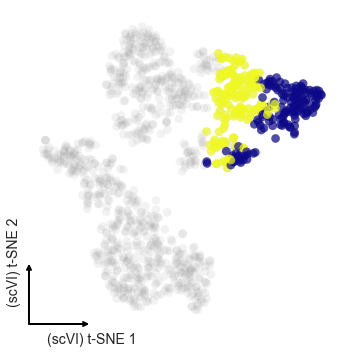

In [110]:
colon_scVI = DR.from_file('pymethods_out/colon_scVI.csv', name='scVI', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_scVI_tSNE = DR.from_file('pymethods_out/colon_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_scVI_tSNE.plot_barcodes(ranks=['3','4'])

In [111]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform=None), post=colon_scVI.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scVI'], final_distance_stats['Colon']['EMD']['scVI'], final_distance_stats['Colon']['KLD']['scVI'] = corr_stats[0], EMD, KLD

R: 0.3231
EMD: 0.1674
KLD: 0.1937
CPU times: user 44.6 ms, sys: 6.23 ms, total: 50.8 ms
Wall time: 72.5 ms


CPU times: user 19.7 s, sys: 399 ms, total: 20 s
Wall time: 20.3 s


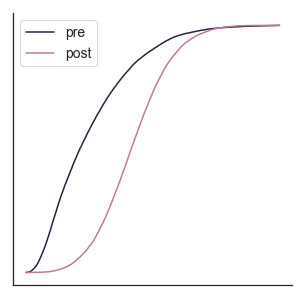

<Figure size 504x504 with 0 Axes>

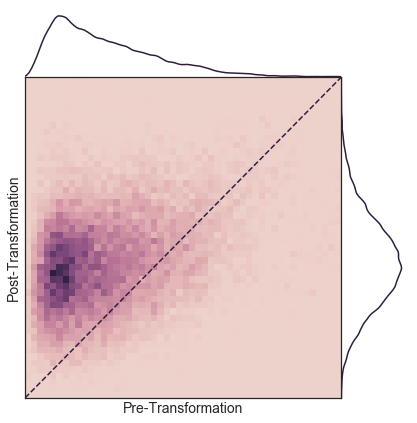

In [112]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

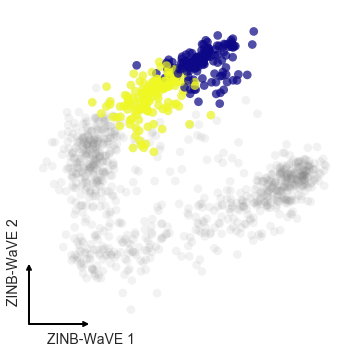

In [113]:
colon_ZINBWAVE = DR.from_file('Rmethods_out/colon_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_ZINBWAVE.plot_barcodes(ranks=['3','4']) 

In [114]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform=None), post=colon_ZINBWAVE.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZINB-WaVE'], final_distance_stats['Colon']['EMD']['ZINB-WaVE'], final_distance_stats['Colon']['KLD']['ZINB-WaVE'] = corr_stats[0], EMD, KLD

R: 0.5004
EMD: 0.1157
KLD: 0.1713
CPU times: user 49 ms, sys: 10.7 ms, total: 59.6 ms
Wall time: 97.2 ms


CPU times: user 19.9 s, sys: 440 ms, total: 20.4 s
Wall time: 20.6 s


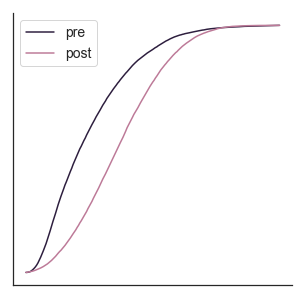

<Figure size 504x504 with 0 Axes>

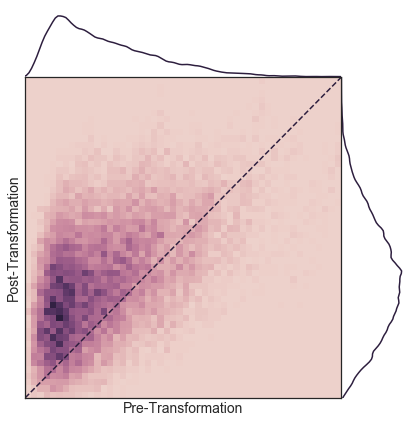

In [115]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

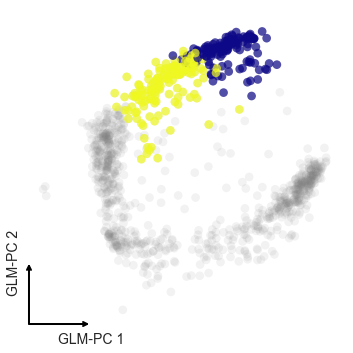

In [116]:
colon_GLMPCA = DR.from_file('Rmethods_out/colon_GLM-PCA.csv', name='GLM-PC', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_GLMPCA.plot_barcodes(ranks=['3','4']) 

In [117]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform=None), post=colon_GLMPCA.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['GLM-PCA'], final_distance_stats['Colon']['EMD']['GLM-PCA'], final_distance_stats['Colon']['KLD']['GLM-PCA'] = corr_stats[0], EMD, KLD

R: 0.4137
EMD: 0.1597
KLD: 0.2002
CPU times: user 46.2 ms, sys: 6.95 ms, total: 53.1 ms
Wall time: 69.2 ms


CPU times: user 18.1 s, sys: 306 ms, total: 18.4 s
Wall time: 17.8 s


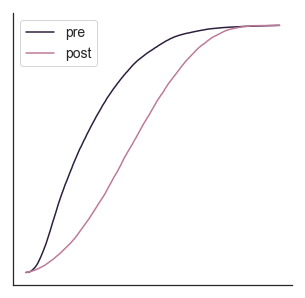

<Figure size 504x504 with 0 Axes>

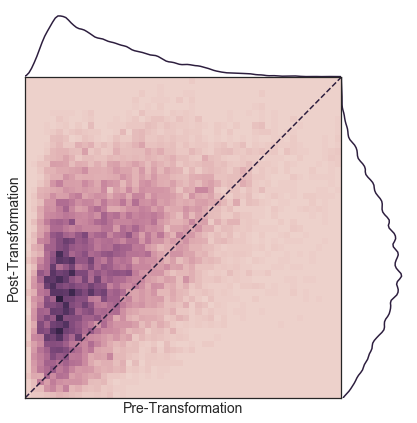

In [118]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

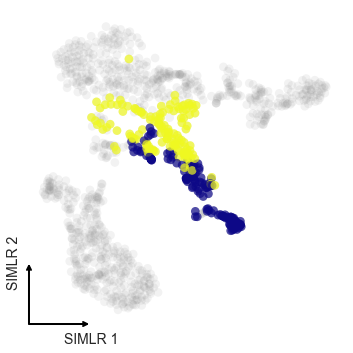

In [119]:
colon_SIMLR = DR.from_file('Rmethods_out/colon_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_SIMLR.plot_barcodes(ranks=['3','4'])

In [120]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=colon.barcode_distance_matrix(ranks=['3','4'], transform='arcsinh'), post=colon_SIMLR.barcode_distance_matrix(ranks=['3','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['SIMLR'], final_distance_stats['Colon']['EMD']['SIMLR'], final_distance_stats['Colon']['KLD']['SIMLR'] = corr_stats[0], EMD, KLD

R: 0.6161
EMD: 0.0973
KLD: 0.1082
CPU times: user 92.8 ms, sys: 17.8 ms, total: 111 ms
Wall time: 68.3 ms


CPU times: user 17.8 s, sys: 293 ms, total: 18.1 s
Wall time: 17.4 s


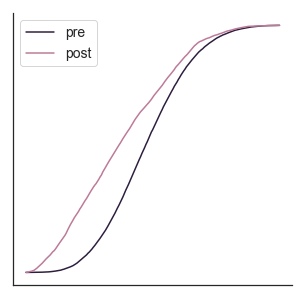

<Figure size 504x504 with 0 Axes>

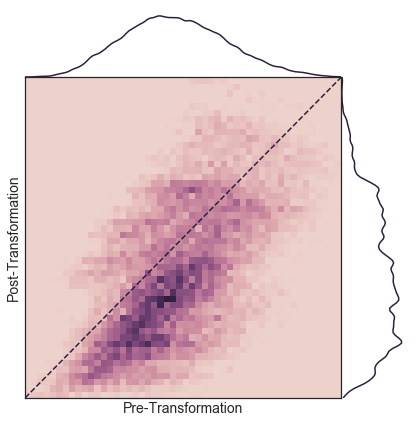

In [121]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/colon_neighborhood_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
### Summary Metrics

In [122]:
retina_sum = pd.DataFrame(final_distance_stats['Retina'])
retina_sum = retina_sum.sort_values(by='R')
retina_sum = retina_sum.reindex(['EMD','KLD','R'], axis=1)
retina_sum.to_csv('retina_neighborhood_metrics.csv')

In [123]:
retina_sum = retina_sum.drop('KLD', axis=1) # dropping KL divergence

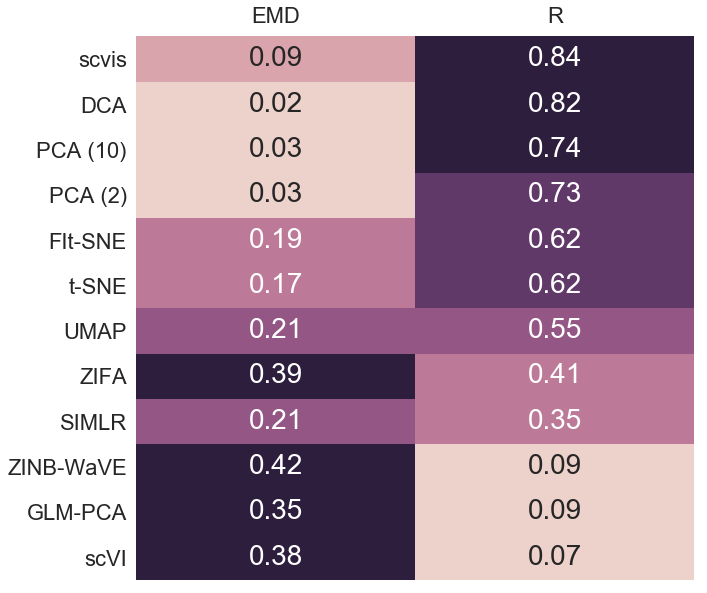

In [124]:
retina_norm=(retina_sum-retina_sum.mean())/retina_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(retina_norm, annot=retina_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.savefig(fname='../images/retina_neighborhood_metrics.png', transparent=True, bbox_inches='tight')

In [125]:
colon_sum = pd.DataFrame(final_distance_stats['Colon'])
colon_sum = colon_sum.sort_values(by='R')
colon_sum = colon_sum.reindex(['EMD','KLD','R'], axis=1)
colon_sum.to_csv('colon_neighborhood_metrics.csv')

In [126]:
colon_sum = colon_sum.drop('KLD', axis=1) # dropping KL divergence

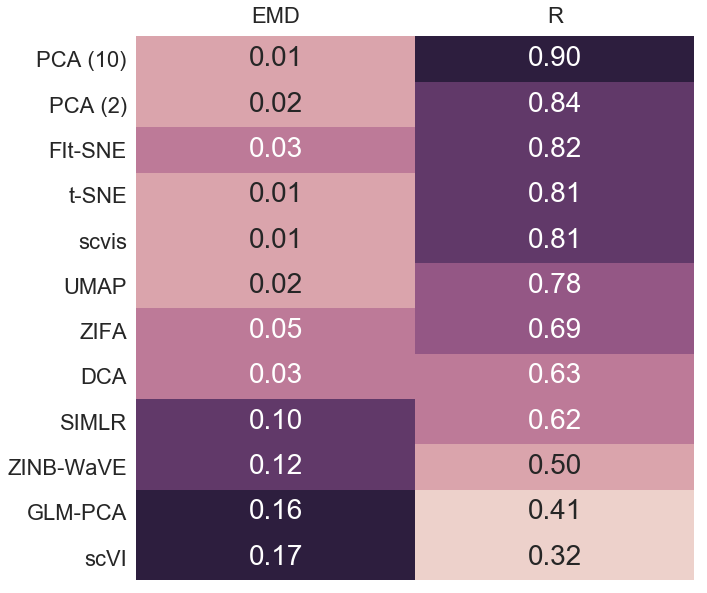

In [127]:
colon_norm=(colon_sum-colon_sum.mean())/colon_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(colon_norm, annot=colon_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.savefig(fname='../images/colon_neighborhood_metrics.png', transparent=True, bbox_inches='tight')